# 线性回归

线性回归可以表示为：
$$\hat{y} = w_1x_1+w_2x_2+....+w_dx_d+b$$
在 $x$ 向量里存放特征，在 $w$ 向量里存放权重。
$$\hat{y} = w^Tx + b$$
进而使用 $X$ 矩阵来存特征。$X$ 的每一行是一个样本，每一列是一种特征。  
可以将其写为：
$$\hat{y} = Xw + b$$
平方误差:
$$l^i(w, b) = \frac{1}{2}( w^Tx + b - y^i)^2$$ 
除2为了求导时可以约去
损失均值:
$$L(w, b) = \frac{1}{2n}\sum_{i=1}^{i=m}( w^Tx + b - y^i)^2$$
式中：$h(x^i)$ ———— 预测值  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$y^i$ —————— 真实值
均方根误差：$$\sqrt{\frac{1}{n}\sum_{i=1}^{m}(\hat{y}_i - y_i )^2  } $$
平均绝对误差：$$\frac{1}{2n}\sum_{i=1}^{m}\left | \left ( \hat{y}_i - y_i  \right )  \right |  $$

设线性模型是 $f(x1, x2, x3) = w_1x_1 + w_2x_2 + b$  
求其梯度，对 w 和 x 分别求偏导。  
[矩阵求导](https://zhuanlan.zhihu.com/p/263777564)  
模型表达式可以写为：
$$ f(x_1, x_2, x_3) = \begin{bmatrix} w_1,
  & w_2
\end{bmatrix} \begin{bmatrix} x_1
 \\x_2

\end{bmatrix} + b $$

$$L(w_1, w_2, b) = \frac{1}{2n}\sum_{i=1}^{i=m}( \begin{bmatrix} w_1,
  & w_2
\end{bmatrix} \begin{bmatrix} x_1
 \\x_2

\end{bmatrix} + b - y^i)^2$$


使用最简单的线性回归模型 $y = wx + b$  
平方误差: 
$$l^i(w, b) = \frac{1}{2}( wx + b - y^i)^2$$
损失均值:
$$L(w, b) = \frac{1}{2n}\sum_{i=1}^{i=m}( wx + b - y^i)^2$$

求梯度的过程（偏导）
$$L(w, b) = \frac{1}{2n}\sum_{i=1}^{i=m}( wx + b - y^i)^2$$
$$\frac{\partial L}{\theta_j} = \frac{\partial}{\theta_j}\frac{1}{2n}\sum_{i=1}^{i=m}( \hat{y} - y^i)^2$$
使用链式法则 
$$\frac{\partial L}{\theta_j} =\frac{1}{n}(\hat{y} - y^i) \frac{\partial}{\theta_j}\sum_{i=1}^{i=m}( \hat{y} - y^i)$$
$$\frac{\partial L}{\theta_j} = \frac{1}{n}(\hat{y} - y^i) \frac{\partial}{\theta_j}\sum_{i=1}^{i=m}( \hat{y} - y^i)$$
$$\frac{\partial L}{\theta_j} = \frac{1}{n}\sum_{i=1}^{i=m}(\hat{y} - y^i) x_j^i$$

可以写出表达式：
因为 $$\hat{y} = \theta_1 x + \theta_0$$

$$
\frac{\mathrm{d} y}{\mathrm{d} \theta_1} = x 
$$

$$
\frac{\mathrm{d} y}{\mathrm{d} \theta_0} = 1 
$$

这样可以得出：
$$
\theta_1 = \theta_1 - \alpha \frac{1}{n}\sum_{i=1}^{i=m}(\hat{y} - y^i) x_j^i
$$

$$
\theta_0 = \theta_1 - \alpha \frac{1}{n}\sum_{i=1}^{i=m}(\hat{y} - y^i)
$$

线性回归实现（不依赖机器学习库）

库）

导入库

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

线性模型和损失函数

In [2]:
def f(x, w, b):
    return x * w + b

def squared_loss(y_pred, y_true):
    return (y_pred - y_true) ** 2 / 2

计算梯度

In [3]:
def gradient_w(y_hat, y_true, x):
    return (y_hat - y_true) * x

def gradient_b(y_hat, y_true, x):
    return (y_hat - y_true)

def gradient(args, n, train_x, train_y , y_hat, lr, grad_func):
    res = np.ones(2)
    j = 0
    for arg in args:
        temp = 0
        for i in range(0, train_x.size):
            cur = grad_func[j](y_hat[i], train_y[i], train_x[i])
            temp += cur
        arg = arg - (lr * temp) / n
        res[j] = arg
        j = j + 1
    return res

读数据集

In [4]:
data_set = pd.read_csv("Salary_dataset.csv")

划分数据集

In [5]:
x = data_set["YearsExperience"]
y = data_set['Salary']
train_set = data_set.sample(frac=0.5, random_state=0, axis=0)
test_set = data_set[~data_set.index.isin(train_set.index)]
x_train = train_set["YearsExperience"].to_numpy()
y_train = train_set["Salary"].to_numpy()
x_test = test_set["YearsExperience"].to_numpy()
y_test = test_set["Salary"].to_numpy()

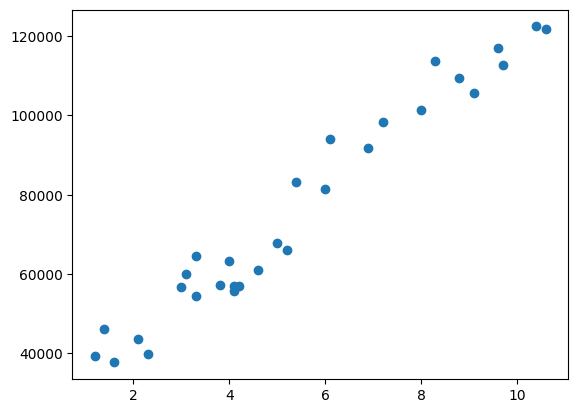

In [6]:
plt.scatter(x, y)
plt.show()

训练

In [7]:
w_b = np.array([1, 0])
y_hat = np.zeros(x_train.size)

for i in range(0, 4600):
    j:int = 0
    for c_x in x_train:
        y_hat[j] = f(c_x, w_b[0], w_b[1])
        j = j + 1
    w_b = gradient(w_b, x_train.size, x_train, y_train, y_hat, 0.03, [gradient_w, gradient_b])
    print("第 %d 次迭代 w = %f  b = %f" % (i, w_b[0], w_b[1]))

第 0 次迭代 w = 16887.560400  b = 2443.207600
第 1 次迭代 w = 11211.972025  b = 1766.783476
第 2 次迭代 w = 13093.431333  b = 2134.528218
第 3 次迭代 w = 12443.837796  b = 2151.825359
第 4 次迭代 w = 12642.091388  b = 2285.790260
第 5 次迭代 w = 12556.465507  b = 2379.971266
第 6 次迭代 w = 12566.019277  b = 2486.773750
第 7 次迭代 w = 12543.790440  b = 2588.648660
第 8 次迭代 w = 12532.303145  b = 2691.477405
第 9 次迭代 w = 12517.313901  b = 2793.293596
第 10 次迭代 w = 12503.592926  b = 2894.759360
第 11 次迭代 w = 12489.542004  b = 2995.656415
第 12 次迭代 w = 12475.695961  b = 3096.061345
第 13 次迭代 w = 12461.875185  b = 3195.951954
第 14 次迭代 w = 12448.139360  b = 3295.339112
第 15 次迭代 w = 12434.468023  b = 3394.222598
第 16 次迭代 w = 12420.867556  b = 3492.605888
第 17 次迭代 w = 12407.335355  b = 3590.491205
第 18 次迭代 w = 12393.871827  b = 3687.881170
第 19 次迭代 w = 12380.476371  b = 3784.778258
第 20 次迭代 w = 12367.148727  b = 3881.184973
第 21 次迭代 w = 12353.888525  b = 3977.103793
第 22 次迭代 w = 12340.695433  b = 4072.537189
第 23 次迭代 w = 12327.56

画出拟合出来的直线

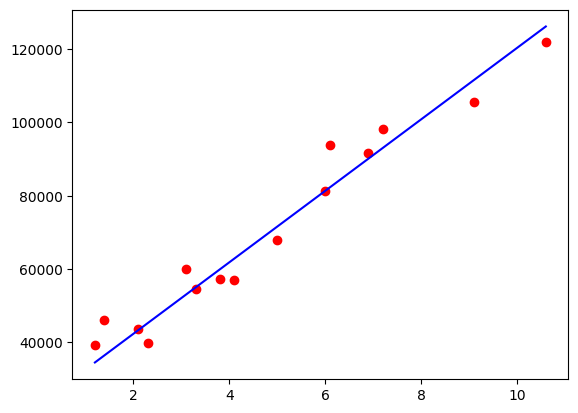

In [8]:
plt.figure()

plt.scatter(x_test, y_test, c='r')
y_hat = np.zeros(x_test.size)

j = 0
for c_x in x_test:
    y_hat[j] = f(c_x, w_b[0], w_b[1])
    j = j + 1

plt.plot(x_test, y_hat, c = "b")
plt.show()

导入库

In [9]:
import torch 
import torch.autograd
import math

使用 pytorch 自动求导的示例
$$y = x^3$$
$$ y' = 3x^2 $$

In [10]:
x = torch.tensor([2.0], requires_grad=True)
y = x ** 3
y.backward() #反向传播,求解导数
print("x.grad = ", x.grad)

x.grad =  tensor([12.])


求偏导数
$$z = y^2 + x^3$$

In [11]:
x = torch.tensor([2.0], requires_grad=True)
y = torch.tensor([2.0], requires_grad=True)
z = y**2 + x**3
z.backward()
print(y.grad)
print(x.grad)

tensor([4.])
tensor([12.])


线性回归（pytorch实现）

训练

In [21]:
w = torch.tensor([1.0], requires_grad=True)
b = torch.tensor([1.0], requires_grad=True)
lr = 0.001

print(n)
for i in range(0, 20000):
    j:int = 0
    loss = (torch.tensor(x_train, requires_grad=True) * w + b - torch.tensor(y_train, requires_grad=True)) ** 2 / 2
    loss.sum().backward()
    with torch.no_grad():
        w.data = w.data - lr  * (w.grad.data / n)
        b.data = b.data - lr  * (b.grad.data / n)
        print(b.grad.data)
        print("第 %d 次迭代 w = %f  b = %f" % (i,w.data, b.data))
        w.grad.zero_()
        b.grad.zero_()

15
tensor([-1221588.7500])
第 0 次迭代 w = 563.879333  b = 82.439255
tensor([-1169595.5000])
第 1 次迭代 w = 1101.689941  b = 160.412292
tensor([-1119915.3750])
第 2 次迭代 w = 1615.547241  b = 235.073318
tensor([-1072445.5000])
第 3 次迭代 w = 2106.517090  b = 306.569702
tensor([-1027087.6250])
第 4 次迭代 w = 2575.618164  b = 375.042206
tensor([-983747.6250])
第 5 次迭代 w = 3023.823242  b = 440.625366
tensor([-942335.7500])
第 6 次迭代 w = 3452.062256  b = 503.447754
tensor([-902766.2500])
第 7 次迭代 w = 3861.223877  b = 563.632202
tensor([-864957.1250])
第 8 次迭代 w = 4252.156738  b = 621.296021
tensor([-828830.])
第 9 次迭代 w = 4625.672363  b = 676.551331
tensor([-794310.0625])
第 10 次迭代 w = 4982.545410  b = 729.505310
tensor([-761325.8125])
第 11 次迭代 w = 5323.516602  b = 780.260376
tensor([-729808.8750])
第 12 次迭代 w = 5649.293457  b = 828.914307
tensor([-699694.])
第 13 次迭代 w = 5960.552246  b = 875.560547
tensor([-670918.7500])
第 14 次迭代 w = 6257.938965  b = 920.288452
tensor([-643423.5625])
第 15 次迭代 w = 6542.070801  b =

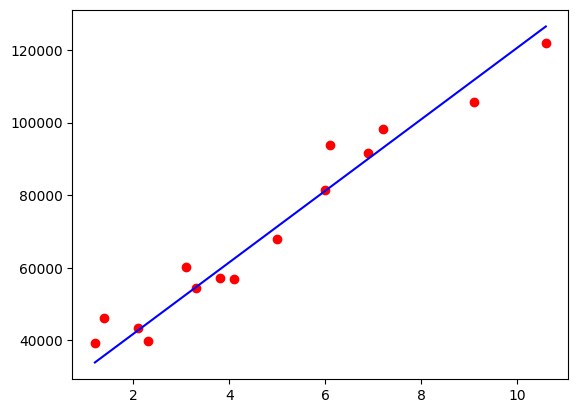

In [13]:
plt.figure()

plt.scatter(x_test, y_test, c='r')
y_hat = np.zeros(x_test.size)

j = 0
for c_x in x_test:
    y_hat[j] = f(c_x, w, b)
    j = j + 1

plt.plot(x_test, y_hat, c = "b")
plt.show()